<h1 style='color:green';>Missing value technique</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1 style='color:red';>1. Mean/Median/Mode technique</h1>

Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
Here, we solve this by replacing the NAN with the most frequent occurance of the variables

In [5]:
new_df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])
new_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
# let go and see the percentage of missing values
new_df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)

In [8]:
# find median
median = new_df.Age.median()
median

28.0

In [9]:
impute_nan(new_df, 'Age', median)
new_df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [10]:
# standard deviation of  age and age_median
print(new_df['Age'].std())
print(new_df['Age_median'].std())

14.526497332334042
13.019696550973201


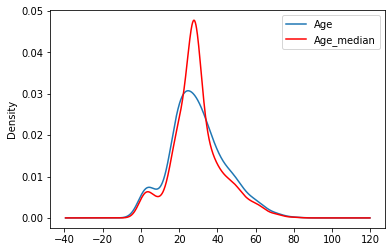

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
new_df['Age'].plot(kind='kde', ax =ax)
new_df.Age_median.plot(kind='kde', ax=ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Advantages and Disadvantages of Mean/Median imputation

### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

<h1 style='color:red';>2. Random Sample Imputation Technique</h1>

Random sample imputation consists of taking random observation from the dataset and we use this observation to
replace the nan values.
it assumes that the data are missing completely at random(MCAR)

In [12]:
# choose a NAN random value using sample function
new_df['Age'].dropna().sample()

728    25.0
Name: Age, dtype: float64

In [13]:
# change NAN with random value
new_df['Age'].dropna().sample(new_df['Age'].isnull().sum(), random_state=42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [14]:
# nan value's index
new_df[new_df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [15]:
def impute_nan2(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=42)
    df[variable+'_random'] = df[variable]
    # we need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [16]:
random = impute_nan2(new_df, 'Age')
new_df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


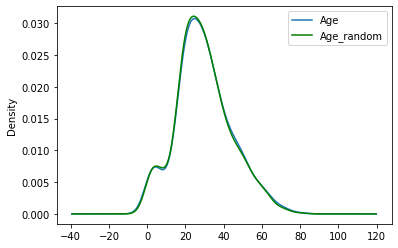

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_df.Age.plot(kind='kde', ax=ax)
new_df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
1. Easy to implement
2. There is less distortion in varience

### Disadvantages
1. Every situation randomness wont work.

<h1 style='color:red';>3. Capturing NAN values with a new feature Technique</h1>

It works well if data are not missing completely at random.

In [18]:
new_df['Age_NAN'] = np.where(new_df['Age'].isnull(), 1, 0)
new_df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,NaN,8.4583,28.0,42.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


### Advantages
1. Easy to implement
2. Captures the importance of missing values

### Disadvantages
1. Creating Additonal Features(Curse of Dimensionality)

<h1 style='color:red';>4. End of Distribution imputation</h1>

It consists of taking the value of far-end distribution and use to replace nan values.The missing value is not at random
then capturing that information is important. One would want to replace missing value data with values that are at the tails
of the distribution of the variable.

In [19]:
df2 = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

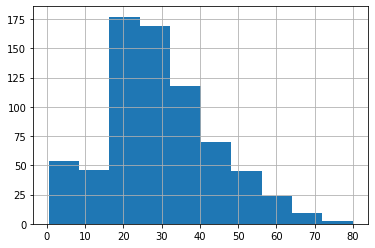

In [20]:
df2.Age.hist()

C:\Users\admin\Desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

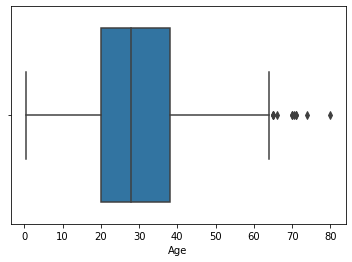

In [21]:
import seaborn as sns
sns.boxplot('Age',data = df2)

we can see that here some outlier at the end (between 70 - 80)

In [22]:
# find value of far end distribution
extreme = df2.Age.mean() + 3*df.Age.std()

In [23]:
def impute_nan3(df, variable, extreme):
    df[variable+'end_distribution'] = df[variable].fillna(extreme) 

In [24]:
impute_nan3(df2, 'Age', extreme)
df2.head(10)

,Survived,Age,Fare,Ageend_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

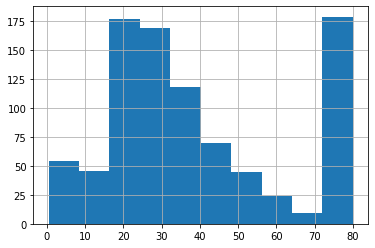

In [25]:
df2.Ageend_distribution.hist()

C:\Users\admin\Desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ageend_distribution'>

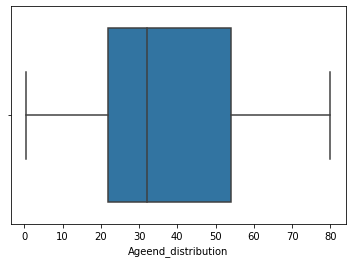

In [26]:
sns.boxplot(df2.Ageend_distribution, data = df2)

After end of distribution, all outliers have gone

### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

### Disadvantages
1. Distorts the original distribution of the variable
2. if missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. if the number of NA is big, it will mask true outliers in the distribution
4. if the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent.


<h1 style='color:red';>5. Arbitrary Imputation</h1>

It consists of replacing NAN by an arbritrary value. It should not be nore frequently present, we may choose least value or last outlier value.

In [27]:
df3 = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
def impute_nan4(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'hundred'] = df[variable].fillna(100)

In [29]:
impute_nan4(df3, 'Age')

In [30]:
df3.head(15)

,Survived,Age,Fare,Age_zero,Agehundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


C:\Users\admin\Desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_zero'>

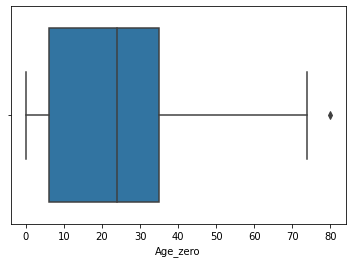

In [31]:
sns.boxplot(df3.Age_zero, data=df3)

C:\Users\admin\Desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agehundred'>

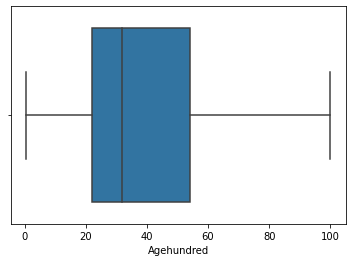

In [32]:
sns.boxplot(df3.Agehundred, data=df3)

### Advantages
Captures the importance of missingess if there is one

### Disadvantage
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the orignial variable by distorting its distribution.
3. Hard to decide which value to use

<h1 style='color:red';>6.Frequent Categories imputation</h1>

In [33]:
df5 = pd.read_csv('house.csv')
df5.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
df5.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [35]:
# choose feature
new_df = pd.read_csv('house.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
new_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [36]:
new_df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [37]:
def group(df, variable):
    print(df.groupby([variable])[variable].count().sort_values(ascending=False))
    print(df[variable].value_counts().plot.bar())

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


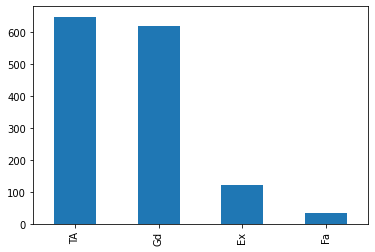

In [38]:
group(new_df, 'BsmtQual')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


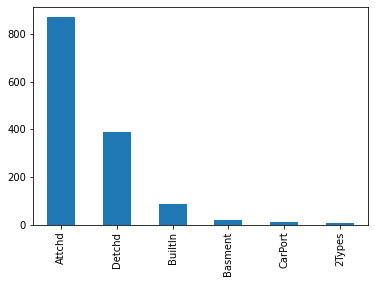

In [39]:
group(new_df, 'GarageType')

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


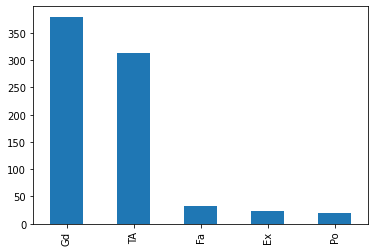

In [40]:
group(new_df, 'FireplaceQu')

In [41]:
new_df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [42]:
new_df['BsmtQual'].value_counts().index[0]
# new_df['BsmtQual'].mode()[0] - also use it

'TA'

In [43]:
def impute_nan4(df, variable):
    frequent_cate = df[variable].mode()[0]
    df[variable].fillna(frequent_cate, inplace = True)

In [44]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan4(new_df, i)

In [45]:
new_df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [46]:
new_df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages 
Fater way to implement

### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many nan's
4. it distorts the relation of the most frequent lable

<h1 style='color:red';>7.Adding a variable to capture empty(NAN)</h1>

This technique works when we have lot of NAN, Here it create variables which 
represent missing as 1

In [47]:
df = pd.read_csv('house.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [48]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,NaN,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,1
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [49]:
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [50]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,Gd,Attchd,143000,1
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


#### Suppose if we have more frequent categories, we just replace NAN with a new category 

In [51]:
df = pd.read_csv('house.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [52]:
def impute_nan(df, variable):
    df[variable] = np.where(df[variable].isnull(), 'missing', df[variable])

In [53]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, i)

In [54]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
